In [2]:
# 02_exploratory_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load cleaned data
df = pd.read_csv('/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 133/Final-Project /GACTT_RESULTS_ANONYMIZED_v2.csv')

# Make plots look a bit nicer
sns.set(style='whitegrid')

A. Overall Favorite Counts

fav_sample
Coffee A     816
Coffee B     781
Coffee C     782
Coffee D    1382
Name: count, dtype: int64


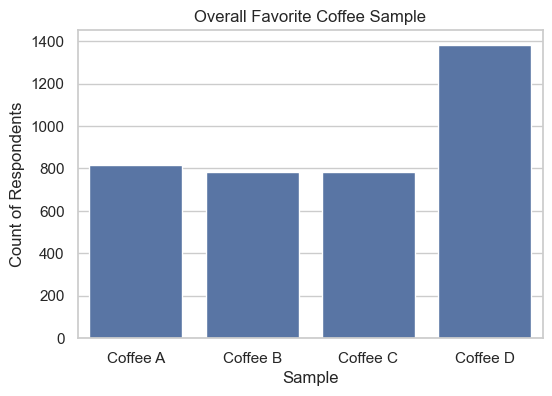

In [3]:
# Count how many times each sample was chosen
fav_counts = df['fav_sample'].value_counts().sort_index()
print(fav_counts)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=fav_counts.index, y=fav_counts.values)
plt.title('Overall Favorite Coffee Sample')
plt.xlabel('Sample')
plt.ylabel('Count of Respondents')
plt.show()

B. Favorite by Age Group

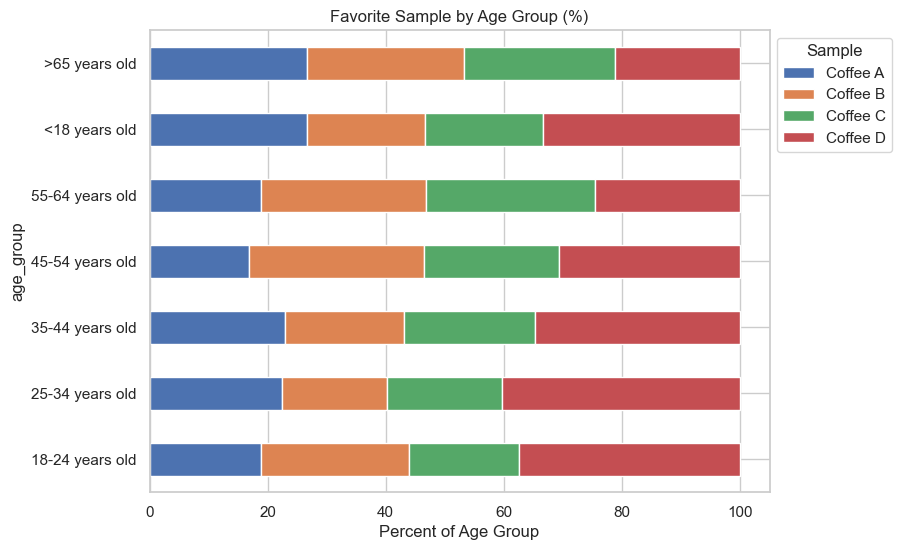

In [4]:
# Crosstab and percentage
ct_age = pd.crosstab(df['age_group'], df['fav_sample'], normalize='index') * 100
ct_age

# Stacked bar chart
ct_age.plot.barh(stacked=True, figsize=(8,6))
plt.title('Favorite Sample by Age Group (%)')
plt.xlabel('Percent of Age Group')
plt.legend(title='Sample', bbox_to_anchor=(1,1))
plt.show()

C. Favorite by Gender

<Figure size 600x400 with 0 Axes>

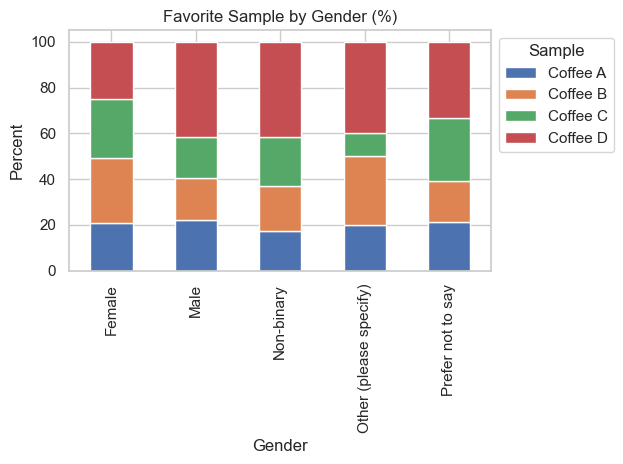

In [6]:
ct_gender = pd.crosstab(df['gender'], df['fav_sample'], normalize='index') * 100

plt.figure(figsize=(6,4))
ct_gender.plot.bar(stacked=True)
plt.title('Favorite Sample by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percent')
plt.legend(title='Sample', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

D. Boxplots of Blind‐Test Scores

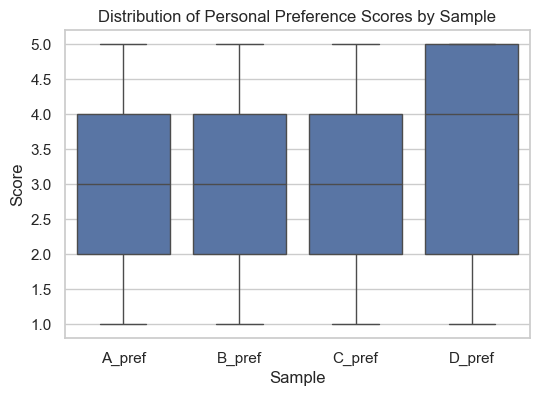

In [7]:
# Melt scores to long form for easier plotting
scores = df.melt(
    id_vars=['id','age_group','gender'],
    value_vars=['A_pref','B_pref','C_pref','D_pref'],
    var_name='Sample', value_name='Score'
)

plt.figure(figsize=(6,4))
sns.boxplot(x='Sample', y='Score', data=scores)
plt.title('Distribution of Personal Preference Scores by Sample')
plt.show()

## 1. Key Takeaways from EDA

### 1.1 Overall Favorites
- **Coffee D dominates**: 1,382 favorites vs. ~780–816 for A, B, and C  
- **Kenyan roast series (A = light, B = medium, C = dark)** all cluster around ~800 picks each

### 1.2 By Age Group
- **Coffee D is the top choice in every age bin**  
  - The youngest (<18) and oldest (>65) bins look almost identical in their distribution  
- **Light vs. Dark (A/B/C) preferences remain within a ~5% band** across all age groups

### 1.3 By Gender
- **All gender categories** (Female, Male, Non-binary, Other, Prefer not to say) pick D most often  
- **Subtle gender differences**:  
  - Females are slightly more likely to choose A than males  
  - Males lean a bit more toward D

### 1.4 Score Distributions
- **Coffee D**  
  - Higher median score (~4)  
  - Longer upper whisker (up to 5)  
- **Coffees A, B, C**  
  - Cluster around a median score of 3  
  - Similar variability in their score distributions